In [42]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import skimage 
from skimage import io, filters

import glob
import os

In [43]:
# Obtain and print the path to the images. Print the number of images in total.
path = str(os.getcwd())
path = path + "/Images/All/*.png"
print(path)

archivos = glob.glob(path)
arch = len(archivos)
print("Files:", arch)

/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/VRI-Measurement and Analysis of Growth and Gene Expression in Bacterial Colonies/ecoli-spatial-correlation/Images/All/*.png
Files: 2


In [44]:
# Filename: the path to a specified image which is going to be analyzed. 
# Arname: the name of the image to be analyzed
#for i in archivos:
#    print(i)

filename = archivos[0] #The 44 value can change to select other pictures. To use all see bottom of the code
arname = filename[177:] #Mod this to have cut to the name of the file only

print(filename)
print(arname)

/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/VRI-Measurement and Analysis of Growth and Gene Expression in Bacterial Colonies/ecoli-spatial-correlation/Images/All/dla_3200_200x200.png
dla_3200_200x200.png


In [45]:
#Modules necesary for the following section
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import colorsys
from PIL import Image
from scipy.spatial import distance

In [46]:
# (1) Import the file to be analyzed!
img_file = Image.open(filename)
img = img_file.load()

# (2) Get image width & height in pixels
[xs, ys] = img_file.size
print("Total image size: ", xs*ys)
max_intensity = 100
pixels = []

# (3) Examine each pixel in the image file
for x in range(0, xs):
    for y in range(0, ys):
        # (4)  Get the RGB color of the pixel
        [r, g, b, k] = img[x, y]

        # (5)  Normalize pixel color values
        r /= 255.0
        g /= 255.0
        b /= 255.0
    
        if r != 0 or g != 0 or b !=0:
            pixels.append([x,y])
            #print("pixel in: (x,y) ", x, y)
            #print(img[x,y])

        # (6)  Convert RGB color to HSV
        #[h, s, v] = colorsys.rgb_to_hsv(r, g, b)

nP = len(pixels)
print("Number of lighted pixels:",nP, " Percentage:", 5747/400, "%")
#print(pixels)


Total image size:  40000
Number of lighted pixels: 5747  Percentage: 14.3675 %


In [47]:
# Obtain the number of pixels in a certain distance
interval = 20
R = np.arange(0, max(xs, ys)*np.sqrt(2) + 1, interval)
nR = len(R)
print("Radius:", R)
dR = 2
count = np.zeros((nP, nR))

pixdist = []
for n1 in range(0, nP):
    pix = pixels[n1]
    xp = pix[0]
    yp = pix[1]
    if n1%int(nP/100) == 0:
        print(n1, n1/nP*100, "%")
    if n1 == nP -1:
        print("100%")
    
    dlist = []
    for n2 in range(0, nP):
        pix2 = pixels[n2]
        xp2 = pix2[0]
        yp2 = pix2[1]
        
        dist = distance.euclidean(pix, pix2)
        dlist.append(dist)
        
        for r in range(0, nR):
            if dist >= R[r] - dR:
                if dist <= R[r] + dR:
                    count[n1, r] += 1
                    
    
    pixdist.append(dlist)

Radius: [   0.   20.   40.   60.   80.  100.  120.  140.  160.  180.  200.  220.
  240.  260.  280.]
0 0.0 %
57 0.9918218200800417 %
114 1.9836436401600834 %
171 2.9754654602401254 %
228 3.967287280320167 %
285 4.959109100400209 %
342 5.950930920480251 %
399 6.942752740560293 %
456 7.934574560640334 %
513 8.926396380720377 %
570 9.918218200800418 %
627 10.91004002088046 %
684 11.901861840960501 %
741 12.893683661040543 %
798 13.885505481120585 %
855 14.877327301200626 %
912 15.869149121280667 %
969 16.86097094136071 %
1026 17.852792761440753 %
1083 18.844614581520794 %
1140 19.836436401600835 %
1197 20.828258221680876 %
1254 21.82008004176092 %
1311 22.811901861840962 %
1368 23.803723681921003 %
1425 24.795545502001044 %
1482 25.787367322081085 %
1539 26.779189142161126 %
1596 27.77101096224117 %
1653 28.76283278232121 %
1710 29.754654602401253 %
1767 30.746476422481294 %
1824 31.738298242561335 %
1881 32.730120062641376 %
1938 33.72194188272142 %
1995 34.71376370280146 %
2052 35.70558

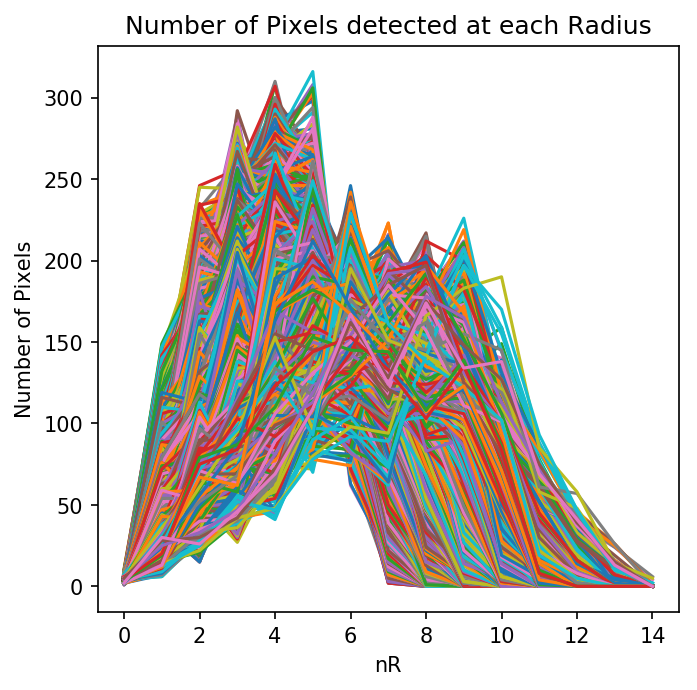

In [48]:
# Plot the count list 
fig1 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(count.transpose())
plt.xlabel('nR')
plt.ylabel('Number of Pixels')
plt.title('Number of Pixels detected at each Radius')
plt.savefig('Gráfico_pix_vs_rad_%s.png' %arname)
plt.show()

(5747, 15)
[  4.45815208e+00   7.06831390e+01   1.24141639e+02   1.59998608e+02
   1.78343136e+02   1.74988690e+02   1.48428745e+02   1.15609187e+02
   8.56453802e+01   5.53676701e+01   2.23716722e+01   7.30746476e+00
   1.99547590e+00   2.61353750e-01   4.52409953e-03]


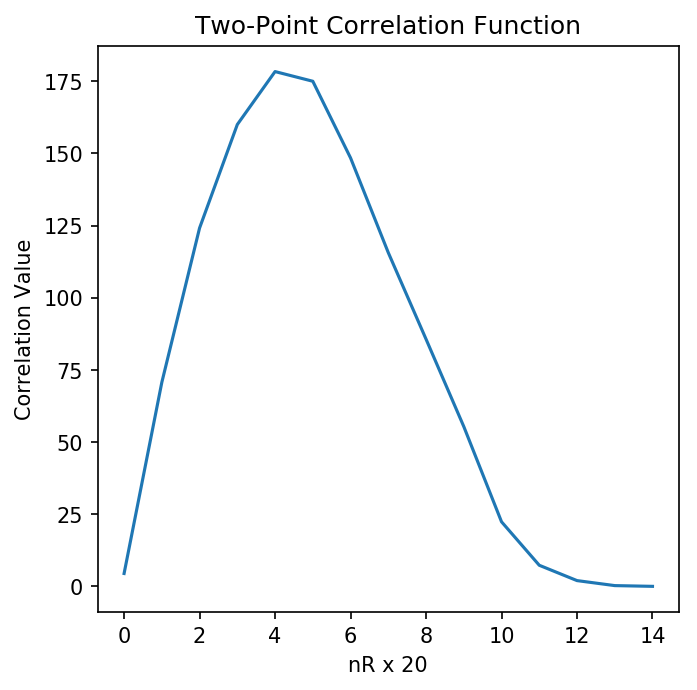

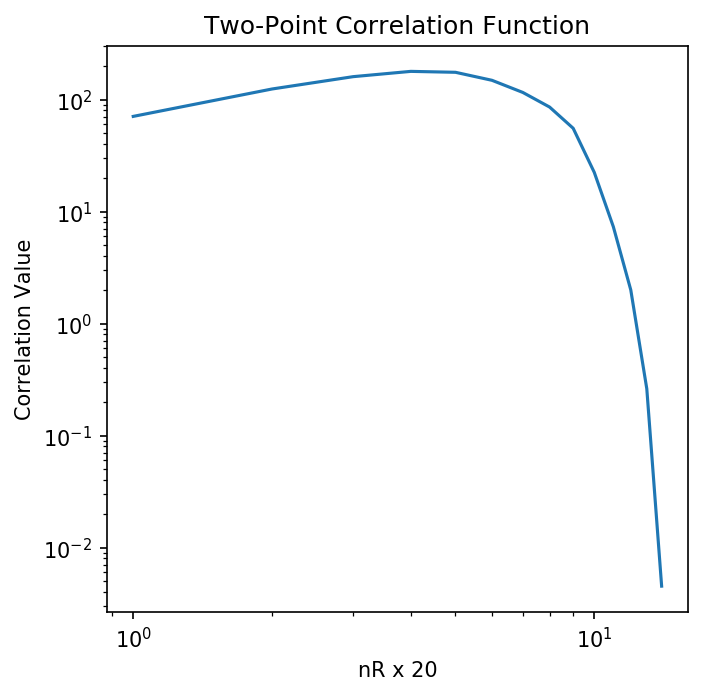

In [51]:
# Caluculates the correlation as two point correlation function http://folk.uio.no/eaker/thesis/node56.html
print(count.shape)
mean = np.mean(count, axis = 0)
print(mean)

# Plot the count list 
fig1 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(mean)
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.title('Two-Point Correlation Function')
plt.savefig('Gráfico_Correlation_%s.png' %arname)
plt.show()

# Plot the count list 
fig1 = plt.figure(figsize=(5, 5), dpi=150)
plt.loglog(mean)
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.title('Two-Point Correlation Function')
plt.savefig('Gráfico_Correlation_%s.png' %arname)
plt.show()

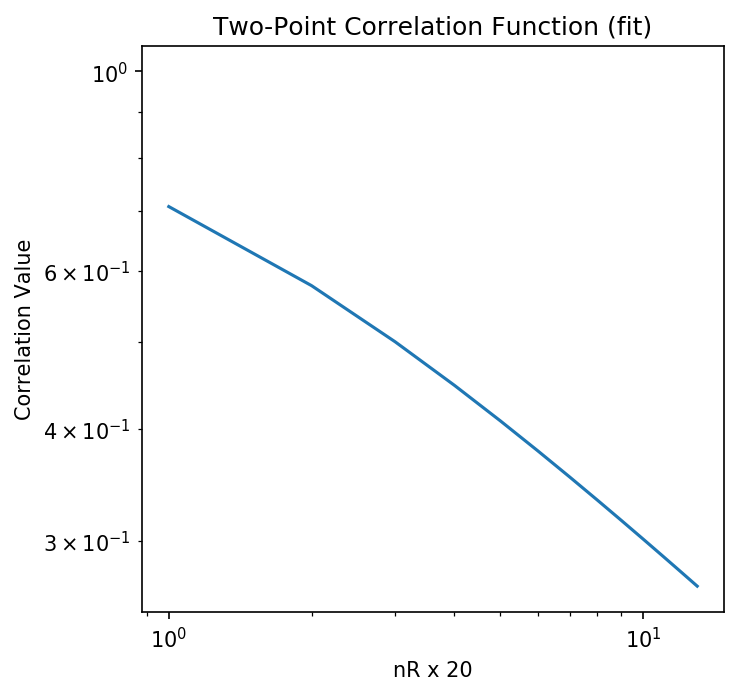

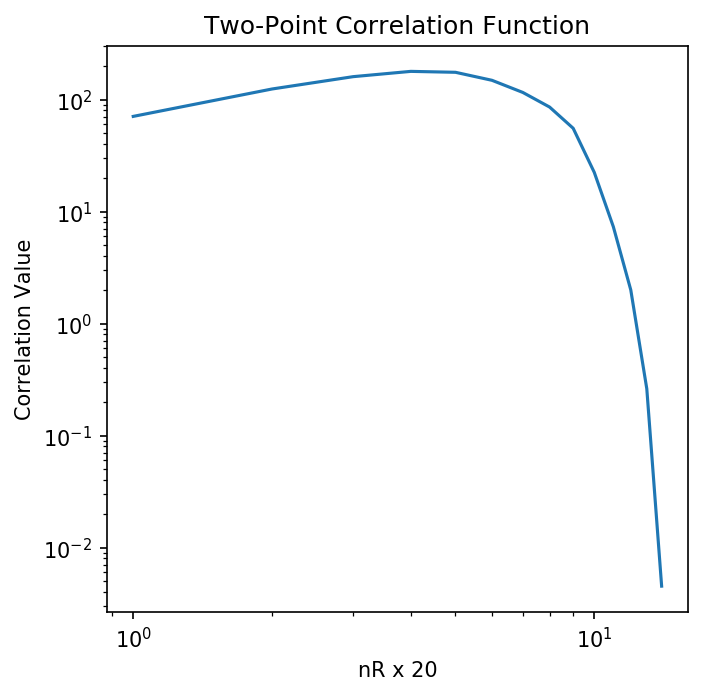

In [50]:
#Calculus od Fractal Dimension and plo
CR = []
alpha = 0.5
A = 1

for rad in range(0, nR):
    if rad == 0:
        continue
    else:
        corad = A*pow(rad, -alpha)
    CR.append(corad)

# Plot the count list 
fig1 = plt.figure(figsize=(5, 5), dpi=150)
plt.loglog(CR)
#plt.plot(CR)
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.title('Two-Point Correlation Function (fit)')
#plt.savefig('Gráfico_Correlation_%s.png' %arname)

fig2 = plt.figure(figsize=(5, 5), dpi=150)
plt.loglog(mean)
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.title('Two-Point Correlation Function')
#plt.savefig('Gráfico_Correlation_%s.png' %arname)
plt.show()

D = 2 #Space dimention (euclidean)

Df = D - alpha #Fractal dimention Df
